In [1]:
# Import necessory packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import warnings
import logging
warnings.filterwarnings('ignore')
logging.getLogger().setLevel(logging.ERROR)

In [2]:
# Importing the data files
sales = pd.read_csv('C:\\Users\\RadmehrFarzad\\OneDrive - Steampunk\\Desktop\\LEK\\all_sales.csv')
product = pd.read_csv('C:\\Users\\RadmehrFarzad\\OneDrive - Steampunk\\Desktop\\LEK\\product_hierarchy.csv')
store = pd.read_csv('C:\\Users\\RadmehrFarzad\\OneDrive - Steampunk\\Desktop\\LEK\\store_cities.csv')

#### Q1

What is the largest product (based on product dimension sizes), and how much revenue was earned from it in 2018?

In [3]:
product['volume'] = product['product_length'] * product['product_depth'] * product['product_width']

In [4]:
product.loc[product.volume == product.volume.max(), 'product_id']

581    P0621
Name: product_id, dtype: object

In [5]:
sales1 = sales.loc[(sales.date >= '2018-01-01') & (sales.date <= '2018-12-31')]
sales1['revenue'] = pd.to_numeric(sales1['revenue'].str.replace("$",""))
sales1['revenue'].loc[sales1.product_id == 'P0621'].fillna(0).sum()

40732.229999999996

#### Q2

Which city produced the most revenue in 2018? How much revenue did that city produce?

In [6]:
sales2 = sales1.groupby('store_id')['revenue'].sum()
sales2 = sales2.to_frame().reset_index()
sales2 = sales2.rename(columns= {0: 'revenue'})

sales2.loc[sales2.revenue == sales2.revenue.max(), 'store_id']

81    S0085
Name: store_id, dtype: object

In [7]:
sales2.revenue.loc[sales2.store_id == 'S0085']

81    776114.4
Name: revenue, dtype: float64

#### Q3

Which product had the greatest number of days in 2019 where it wasn’t available in at least one store, how many days of the year was the product out of stock in at least one store?

In [8]:
import datetime
sales3 = sales.loc[(sales.date >= '2019-01-01') & (sales.date <= '2019-12-31')]
sales3['date'] = pd.to_datetime(sales3['date'], format='%Y-%m-%d')

In [9]:
#sales3 = sales.loc[(sales.date >= '2019-01-01') & (sales.date <= '2019-12-31')]
sales3 = sales3[['product_id','date']]
sales3 = sales3.loc[sales.stock == 0]
g = sales3.sort_values('date').groupby('product_id').last() - sales3.sort_values('date').groupby('product_id').first()
g = g.reset_index()
g['days'] = pd.DataFrame(g["date"].dt.days)
print("greatest number of days a product is OOS in at least one store: ")
print(g.days.max())
print("proudct ID is: ")
g.loc[g.days == 303].product_id

greatest number of days a product is OOS in at least one store: 
303
proudct ID is: 


101    P0140
107    P0148
138    P0185
156    P0210
164    P0219
233    P0311
273    P0364
308    P0413
323    P0428
341    P0453
419    P0550
428    P0561
562    P0735
Name: product_id, dtype: object

#### Q4

Client’s C-Suite is wondering what the key drivers of sales are. As part of that, they are specifically wondering if there is a correlation between store size and the number of sales each store generates over years.

In [10]:
sales4 = sales[['store_id','date','sales']]
sales4.sales = sales4.sales.fillna(0)
sales4['date'] = pd.to_datetime(sales4['date'], format='%Y-%m-%d')
sales4 = pd.DataFrame(sales4.groupby('store_id').sales.sum()).reset_index()
sales4 = sales4.join(store.set_index('store_id'), on='store_id')[['sales','store_size']]

In [11]:
sales4.corr(method='pearson')

,sales,store_size
sales,1.000000,-0.532653
store_size,-0.532653,1.000000


#### Q5-a

Client wants to segment products based on product dimensions so that they can customize the promotions on these defined segments. Build product segments and define names for each segment that will help you to explain them to the client’s C-Suite.

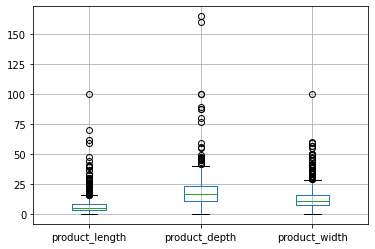

In [12]:
import matplotlib.pyplot as plt
boxplot = product.boxplot(column=['product_length', 'product_depth', 'product_width'])  

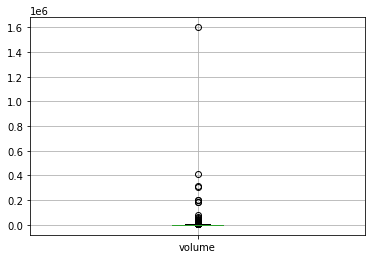

In [13]:
import matplotlib.pyplot as plt
boxplot = product.boxplot(column=['volume'])  

In [14]:
product.describe()

,product_length,product_depth,product_width,volume
count,681.000000,683.000000,683.000000,6.810000e+02
mean,7.232305,18.460908,13.454758,7.225686e+03
std,8.512507,14.269750,10.137132,6.713589e+04
min,0.000000,0.000000,0.000000,0.000000e+00
25%,3.000000,10.900000,7.450000,3.240000e+02
50%,5.000000,17.000000,10.800000,7.264950e+02
75%,8.000000,23.150000,16.000000,1.875000e+03
max,100.000000,165.000000,100.000000,1.600000e+06


category 1 (small items: 25% of the products have less than following sizes): length <= 3, depth <= 11, width <= 7.5/
/category 2 (median items: 50% of the products have less than following sizes): length <= 5, depth <= 17, width <= 10.8/
/category 3 (large items: 75% of the products have less than following sizes): length <= 8, depth <= 23, width <= 16/
/category 4 (very large items: 25% of the products have more than following sizes): length > 8, depth > 23, width > 16

In [15]:
from statistics import mode
mode(product.product_length)

5.0